In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')
# If code is in the drive, the following line works, otherwise add folder names
os.chdir('/content/drive/My Drive/Code/EXTRA DATASET')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import os
import numpy as np
import re

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [7]:
with open('friendssparks.pkl', 'rb') as fp:
  friends = pickle.load(fp)

In [8]:
keys = list(friends.keys())
df = friends[keys[0]]
df

,conversation_id,text,speaker,Season,Episode,Season_Episode,Next Speaker,Y,Sentence Length
0,s01_e01_c01_u001,There's nothing to tell! He's just some guy I ...,Monica Geller,s01,e01,"[s01, e01]",Monica Geller,0,11
1,s01_e01_c01_u001,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01,e01,"[s01, e01]",Monica Geller,1,14
2,s01_e01_c01_u001,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01,e01,"[s01, e01]",Joey Tribbiani,1,16
3,s01_e01_c01_u001,"Wait, does he eat chalk?",Phoebe Buffay,s01,e01,"[s01, e01]",Chandler Bing,1,5
4,s01_e01_c01_u001,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01,e01,"[s01, e01]",Phoebe Buffay,0,16
...,...,...,...,...,...,...,...,...,...
295,s01_e01_c15_u001,"Yeah. Yeah, I'll have a cup of coffee.",#ALL#,s01,e01,"[s01, e01]",Rachel Green,1,8
296,s01_e01_c15_u001,"Kids, new dream... I'm in Las Vegas.",Chandler Bing,s01,e01,"[s01, e01]",#ALL#,1,7
297,s01_e01_c15_u001,"Ahh, miss? More coffee?",Customer,s01,e01,"[s01, e01]",Chandler Bing,1,4
298,s01_e01_c15_u001,"Ugh. Excuse me, could you give this to that gu...",Rachel Green,s01,e01,"[s01, e01]",Customer,1,20


In [9]:
with open('friendsconcattedframe.pkl', 'rb') as fp:
    concatted_friends = pickle.load(fp)
concatted_friends

,conversation_id,text,speaker,Season,Episode,Season_Episode,Next Speaker,Y,Sentence Length
0,s01_e01_c01_u001,There's nothing to tell! He's just some guy I ...,Monica Geller,s01,e01,"[s01, e01]",Monica Geller,0,11
1,s01_e01_c01_u001,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01,e01,"[s01, e01]",Monica Geller,1,14
2,s01_e01_c01_u001,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01,e01,"[s01, e01]",Joey Tribbiani,1,16
3,s01_e01_c01_u001,"Wait, does he eat chalk?",Phoebe Buffay,s01,e01,"[s01, e01]",Chandler Bing,1,5
4,s01_e01_c01_u001,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01,e01,"[s01, e01]",Phoebe Buffay,0,16
...,...,...,...,...,...,...,...,...,...
61302,s10_e18_c11_u000,"Oh, it's gonna be okay.",Chandler Bing,s10,e18,"[s10, e18]",Monica Geller,1,5
61303,s10_e18_c11_u000,Do you guys have to go to the new house right ...,Rachel Green,s10,e18,"[s10, e18]",Chandler Bing,1,18
61304,s10_e18_c11_u000,We got some time.,Monica Geller,s10,e18,"[s10, e18]",Rachel Green,1,4
61305,s10_e18_c11_u000,"Okay, should we get some coffee?",Rachel Green,s10,e18,"[s10, e18]",Monica Geller,1,6


In [10]:
%%time
mins = {}
means = {}
maxs = {}

minssens = {}
meanssens = {}
maxssens = {}

scriptlengths = {}
numspeakers_perscript = {}

negsperscript = {}
posperscript = {}

for key in keys:
  df = friends[key]
  dfsen = df['Sentence Length']
  dfconv = df['conversation_id'].value_counts()

  mins[key] = dfconv.min()
  means[key] = dfconv.mean()
  maxs[key] = dfconv.max()

  minssens[key] = dfsen.min()
  meanssens[key] = dfsen.mean()
  maxssens[key] = dfsen.max()

  scriptlengths[key] = len(df)
  numspeakers_perscript[key] = len(df.speaker.unique())

  negsperscript[key] = len(df[df.Y == 0])
  posperscript[key] = len(df[df.Y == 1])

CPU times: user 429 ms, sys: 5.02 ms, total: 434 ms
Wall time: 440 ms


In [11]:
# Create a dataframe to show maximum lenghts of sentences
maxdf = pd.DataFrame(pd.Series(maxs))
maxdf = maxdf.reset_index().rename(columns={'index':'File_name',0:'Maximum Length'})

# Create frame of scriptlengths
scriptlengthsdf = pd.DataFrame(pd.Series(scriptlengths))
scriptlengthsdf = scriptlengthsdf.reset_index().rename(columns={'index':'File_name',0:'Script Length'})
#display(scriptlengthsdf)

# Create frame of number of speakers per script
numspeakers_perscriptdf = pd.DataFrame(pd.Series(numspeakers_perscript))
numspeakers_perscriptdf = numspeakers_perscriptdf.reset_index().rename(columns={'index':'File_name',0:'Number of Speakers per Script'})
#display(numspeakers_perscriptdf)

# Create frame negatives per script (same speaker)
negsperscriptdf = pd.DataFrame(pd.Series(negsperscript))
negsperscriptdf = negsperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Negatives_ps'})
#display(negsperscriptdf)

# Create frame positives per script (different speaker)
posperscriptdf = pd.DataFrame(pd.Series(posperscript))
posperscriptdf = posperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Positives_ps'})
display(posperscriptdf)


,level_0,level_1,Positives_ps
0,s01,e01,292
1,s01,e02,236
2,s01,e03,249
3,s01,e04,248
4,s01,e05,229
...,...,...,...
231,s10,e14,312
232,s10,e15,236
233,s10,e16,256
234,s10,e17,361


In [12]:
# REF https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# Return dataframe with outliers and outlier values
def outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1
  threshold = 1.5

  left_outliers = Q1 - threshold * IQR
  right_outliers = Q3 + threshold * IQR

  return df[(df[col] < left_outliers) | (df[col] > right_outliers)], left_outliers, right_outliers

In [13]:
# Create plots
def plots(df,col,lx=None,rx=None):
  plt.figure(figsize=(6, 5))

  ax = sns.histplot(df[col], color='g', bins=100, kde=True)
  ax.set_title("Frequency Distribution of {}s DS3".format(col))

  if lx != None:
    ax.axvline(x = lx)
  if rx != None:
    ax.axvline(x =rx)

  return ax

## Script Lengths

In [14]:
serie = scriptlengthsdf['Script Length']

print("Shortest script length: ",serie.min(),". Mean script length: ",serie.mean(),". Longest script length: ",serie.max(),". Most occurances script length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(scriptlengthsdf.sort_values('Script Length',ascending=False)[:15])

Shortest script length:  173 . Mean script length:  259.77542372881356 . Longest script length:  516 . Most occurances script length:  255 .
Median:  255.5


,level_0,level_1,Script Length
96,s04,e24,516
234,s10,e17,382
161,s07,e16,359
218,s10,e01,346
118,s05,e22,336
222,s10,e05,333
68,s03,e21,332
225,s10,e08,329
228,s10,e11,329
216,s09,e23,325


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS3'}, xlabel='Script Length', ylabel='Count'>

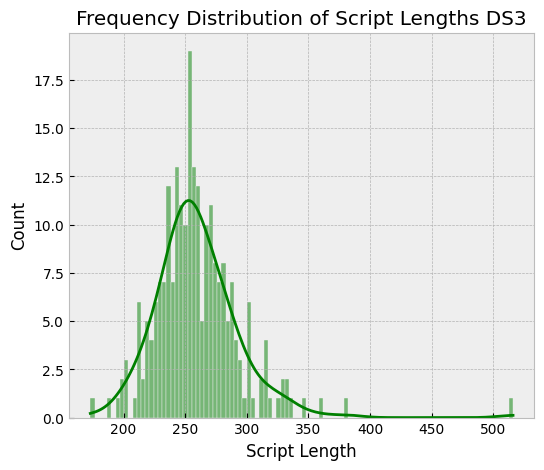

In [15]:
  print("Frequency distribution plot")
  display(plots(scriptlengthsdf,'Script Length'))

In [16]:
output = outliers(scriptlengthsdf,'Script Length')
outliers_df = output[0]
lxs = output[1]
rxs = output[2]

print("Left outliers are outside: ",lxs,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxs,".")
print('Percentage of the whole ',(len(scriptlengthsdf[scriptlengthsdf['Script Length'] > rxs])*100)/len(scriptlengthsdf),'%')

Left outliers are outside:  184.625 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  329.625 .
Percentage of the whole  2.9661016949152543 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS3'}, xlabel='Script Length', ylabel='Count'>

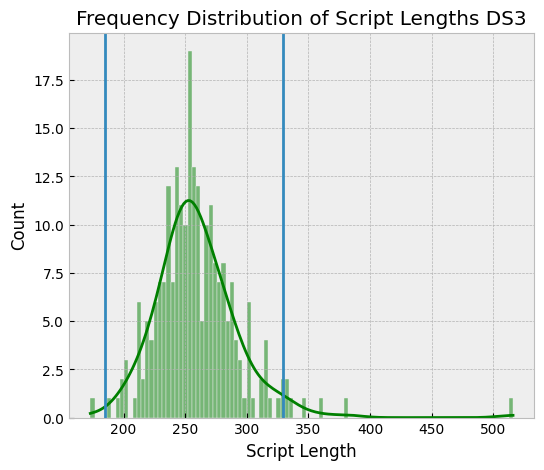

In [17]:
print("Frequency distribution plot with outlier boundaries")
ax = plots(scriptlengthsdf,'Script Length',lx=lxs,rx=rxs)
# Save plot to file
#plt.savefig("friends2SCRIPTSFrequencyscriptlengthswoutliers.png")
display(ax)

In [18]:
indices = outliers_df.index
scriptlengthsdf = scriptlengthsdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS3'}, xlabel='Script Length', ylabel='Count'>

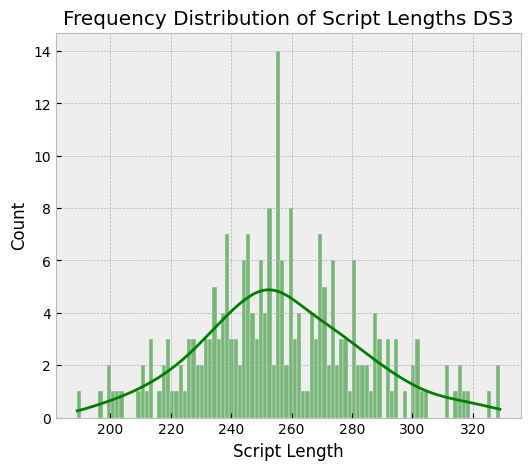

In [19]:
print("Frequency distribution plot without outliers")
display(plots(scriptlengthsdf,'Script Length'))

## Sentence Lengths

In [20]:
serie = concatted_friends['Sentence Length']

print("Shortest sentence length: ",serie.min(),". Mean sentence length: ",serie.mean(),". Longest sentence length: ",serie.max(),". Most occurances sentence length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(concatted_friends.sort_values('Sentence Length',ascending=False)[:15])

Shortest sentence length:  1 . Mean sentence length:  10.15818748266919 . Longest sentence length:  196 . Most occurances sentence length:  1 .
Median:  7.0


,conversation_id,text,speaker,Season,Episode,Season_Episode,Next Speaker,Y,Sentence Length
48131,s08_e18_c04_u001,"No, no it's going to be great. Really! Mom, Da...",Monica Geller,s08,e18,"[s08, e18]",Monica Geller,0,196
28692,s05_e17_c14_u001,Now you're probably going to hire one of the p...,Rachel Green,s05,e17,"[s05, e17]",Mr. Zelner,1,173
51312,s09_e07_c01_u000,"And that's why, no matter what mommy says, we ...",Ross Geller,s09,e07,"[s09, e07]",Ross Geller,0,160
49,s01_e01_c01_u001,"Oh God... well, it started about a half hour b...",Rachel Green,s01,e01,"[s01, e01]",Monica Geller,1,149
3386,s01_e14_c15_u001,"No, it's just...you know the whole ""getting on...",Ross Geller,s01,e14,"[s01, e14]",Carol Willick,1,148
28208,s05_e15_c10_u001,"All right, everyone calm down! Everyone calm d...",Phoebe Buffay,s05,e15,"[s05, e15]",Steve Cera,1,146
51455,s09_e07_c09_u000,Okay... aahhh... Please laugh for mommy... Ple...,Rachel Green,s09,e07,"[s09, e07]",Monica Geller,1,145
31921,s06_e05_c11_u001,"Me taking care of you is no problem, huh? You ...",Phoebe Buffay,s06,e05,"[s06, e05]",Joey Tribbiani,1,143
59402,s10_e12_c04_u000,Ok. Hello everyone and thank you all for being...,Phoebe Buffay,s10,e12,"[s10, e12]",Monica Geller,1,138
47176,s08_e14_c08_u001,"Uh, really good. Really good. Yeah, I should b...",Joey Tribbiani,s08,e14,"[s08, e14]",Chandler Bing,1,125


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS3'}, xlabel='Sentence Length', ylabel='Count'>

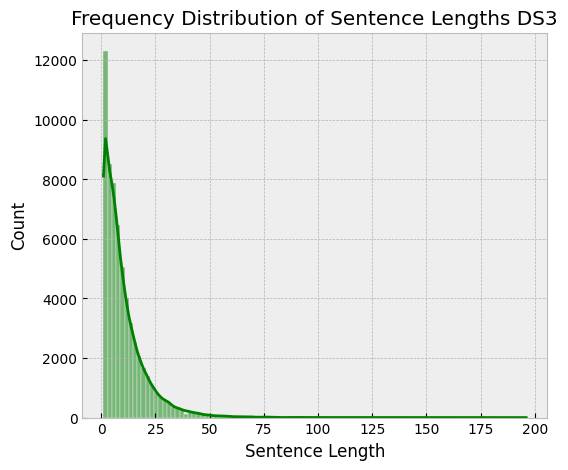

In [21]:
print("Frequency distribution plot")
display(plots(concatted_friends,'Sentence Length'))

Frequency distribution plot of maximum sentence lengths per scripts


<Axes: title={'center': 'Frequency Distribution of Maximum Lengths DS3'}, xlabel='Maximum Length', ylabel='Count'>

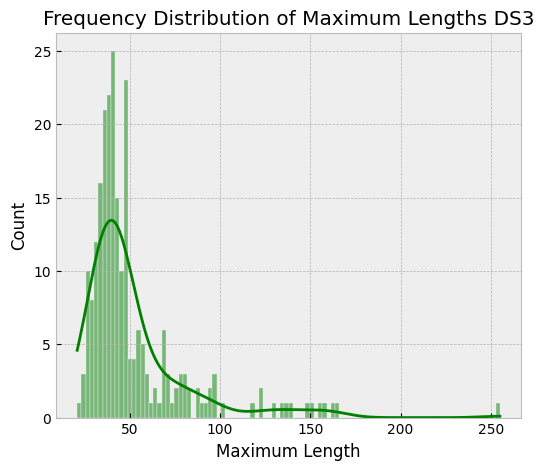

In [22]:
print("Frequency distribution plot of maximum sentence lengths per scripts")
display(plots(maxdf,'Maximum Length'))

In [23]:
concatted_friends['Index'] = concatted_friends.index
concatted_friends

,conversation_id,text,speaker,Season,Episode,Season_Episode,Next Speaker,Y,Sentence Length,Index
0,s01_e01_c01_u001,There's nothing to tell! He's just some guy I ...,Monica Geller,s01,e01,"[s01, e01]",Monica Geller,0,11,0
1,s01_e01_c01_u001,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01,e01,"[s01, e01]",Monica Geller,1,14,1
2,s01_e01_c01_u001,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01,e01,"[s01, e01]",Joey Tribbiani,1,16,2
3,s01_e01_c01_u001,"Wait, does he eat chalk?",Phoebe Buffay,s01,e01,"[s01, e01]",Chandler Bing,1,5,3
4,s01_e01_c01_u001,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01,e01,"[s01, e01]",Phoebe Buffay,0,16,4
...,...,...,...,...,...,...,...,...,...,...
61302,s10_e18_c11_u000,"Oh, it's gonna be okay.",Chandler Bing,s10,e18,"[s10, e18]",Monica Geller,1,5,61302
61303,s10_e18_c11_u000,Do you guys have to go to the new house right ...,Rachel Green,s10,e18,"[s10, e18]",Chandler Bing,1,18,61303
61304,s10_e18_c11_u000,We got some time.,Monica Geller,s10,e18,"[s10, e18]",Rachel Green,1,4,61304
61305,s10_e18_c11_u000,"Okay, should we get some coffee?",Rachel Green,s10,e18,"[s10, e18]",Monica Geller,1,6,61305


In [24]:
output = outliers(concatted_friends,'Sentence Length')
outliers_df = output[0]
lxsl = output[1]
rxsl = output[2]

print("Left outliers are outside: ",lxsl,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsl,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(concatted_friends[concatted_friends['Sentence Length'] > rxsl])*100)/len(concatted_friends),'%')

Left outliers are outside:  -13.5 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  30.5 .
These are there; see plot.
Percentage of the whole  4.7759635930644135 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS3'}, xlabel='Sentence Length', ylabel='Count'>

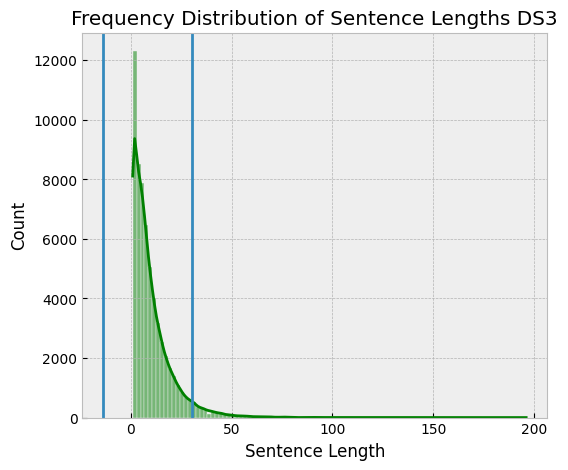

In [25]:
print("Frequency distribution plot with outlier boundaries")
ax2 = plots(concatted_friends,'Sentence Length',lx=lxsl,rx=rxsl)
# Save plot to file
#plt.savefig("friendsSENTENCESFrequencysentencelenghts.png")
display(ax2)

In [26]:
indices = outliers_df.index
inds = pd.DataFrame({'Index':indices})
#inds

In [27]:
div = int(len(concatted_friends)/5)
div2 = div + div
div3 = div2 + div
div4 = div3 + div

div,div2,div3,div4

(12261, 24522, 36783, 49044)

In [28]:
condiv1 = concatted_friends[:div]
condiv2 = concatted_friends[div:div2]
condiv3 = concatted_friends[div2:div3]
condiv4 = concatted_friends[div3:div4]
condiv5 = concatted_friends[div4:]

In [29]:
condiv1 = condiv1.drop(inds.merge(condiv1, how='inner')['Index'].tolist())
#print(len(condiv1))
condiv2 = condiv2.drop(inds.merge(condiv2, how='inner')['Index'].tolist())
#print(len(condiv2))
condiv3 = condiv3.drop(inds.merge(condiv3, how='inner')['Index'].tolist())
#print(len(condiv3))
condiv4 = condiv4.drop(inds.merge(condiv4, how='inner')['Index'].tolist())
#print(len(condiv4))
condiv5 = condiv5.drop(inds.merge(condiv5, how='inner')['Index'].tolist())
#print(len(condiv5))

In [30]:
concatted_friends = pd.concat([condiv1,condiv2,condiv3,condiv4,condiv5])

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS3'}, xlabel='Sentence Length', ylabel='Count'>

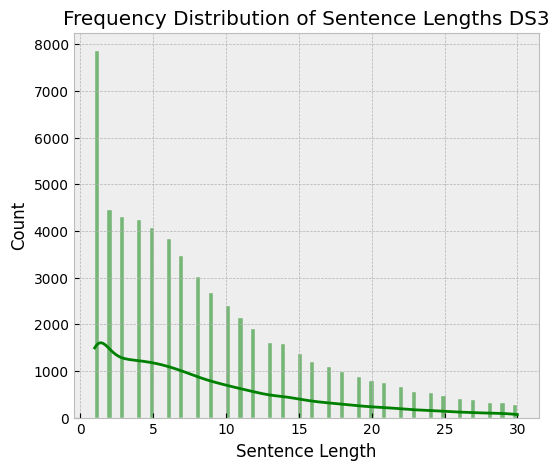

In [31]:
print("Frequency distribution plot without outliers")
display(plots(concatted_friends,'Sentence Length'))

## Conversational splits

In [32]:
serie = concatted_friends['conversation_id'].value_counts()

print("Shortest conversation length: ",serie.min(),". Mean conversation length: ",serie.mean(),". Longest conversation length: ",serie.max(),
      ". Most occurances conversation length: ",serie.mode()[0],".")
print("Median conversation length: ",serie.median())

display(serie.sort_values(ascending=False)[:15])
df = pd.DataFrame()
df['Conversation Length'] = serie

Shortest conversation length:  1 . Mean conversation length:  19.046982055464927 . Longest conversation length:  234 . Most occurances conversation length:  11 .
Median conversation length:  16.0


s09_e08_c01_u000    234
s08_e06_c03_u001    158
s10_e04_c03_u000    156
s10_e10_c05_u000    152
s03_e02_c03_u001    147
s10_e08_c08_u000    147
s09_e18_c02_u000    142
s03_e09_c03_u001    137
s10_e01_c01_u000    136
s08_e09_c02_u001    130
s03_e16_c13_u001    122
s07_e21_c04_u001    121
s04_e08_c08_u001    117
s05_e19_c02_u001    115
s05_e19_c03_u001    102
Name: conversation_id, dtype: int64

Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS3'}, xlabel='Conversation Length', ylabel='Count'>

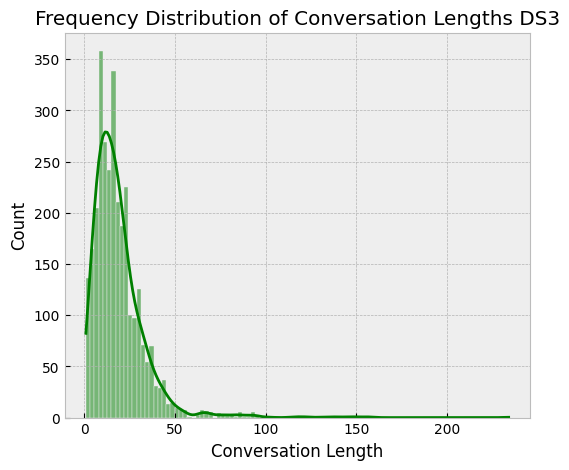

In [33]:
print("Frequency distribution plot")
display(plots(df,'Conversation Length'))

In [34]:
df['Index'] = df.index

In [35]:
output = outliers(df,'Conversation Length')
outliers_df = output[0]
lxsl = output[1]
rxsl = output[2]

print("Left outliers are outside: ",lxsl,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsl,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(df[df['Conversation Length'] > rxsl])*100)/len(df),'%')

Left outliers are outside:  -11.0 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  45.0 .
These are there; see plot.
Percentage of the whole  3.7520391517128875 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS3'}, xlabel='Conversation Length', ylabel='Count'>

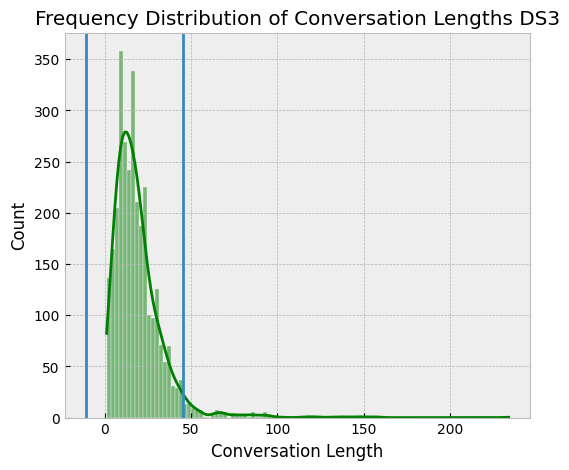

In [36]:
print("Frequency distribution plot with outlier boundaries")
ax2 = plots(df,'Conversation Length',lx=lxsl,rx=rxsl)
# Save plot to file
#plt.savefig("friendsConversationFrequencysentencelenghts.png")
display(ax2)

In [37]:
indices = outliers_df.index
df = df.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS3'}, xlabel='Conversation Length', ylabel='Count'>

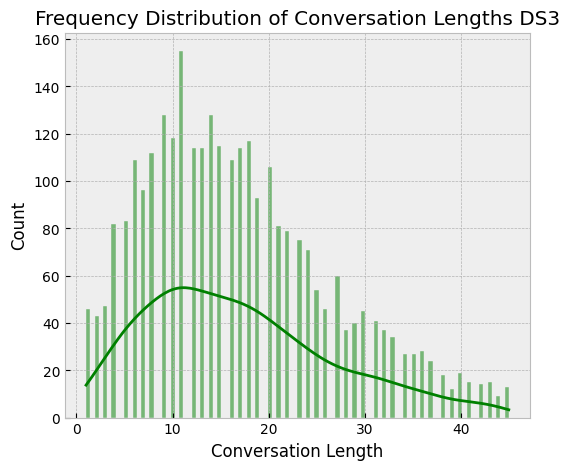

In [38]:
print("Frequency distribution plot without outliers")
display(plots(df,'Conversation Length'))

## Number of Speakers per Script

In [39]:
serie = numspeakers_perscriptdf['Number of Speakers per Script']

print("Least speakers per script: ",serie.min(),". Mean speakers per script: ",serie.mean(),". Most speakesr per script: ",serie.max(),". Most occurances speaker counts: ",serie.mode()[0],".")
print("Median",serie.median())
display(numspeakers_perscriptdf.sort_values('Number of Speakers per Script',ascending=False)[:15])

Least speakers per script:  6 . Mean speakers per script:  12.122881355932204 . Most speakesr per script:  21 . Most occurances speaker counts:  11 .
Median 12.0


,level_0,level_1,Number of Speakers per Script
144,s06,e24,21
71,s03,e24,20
231,s10,e14,20
96,s04,e24,20
170,s08,e01,20
15,s01,e16,19
58,s03,e11,18
175,s08,e06,18
29,s02,e06,18
69,s03,e22,18


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS3'}, xlabel='Number of Speakers per Script', ylabel='Count'>

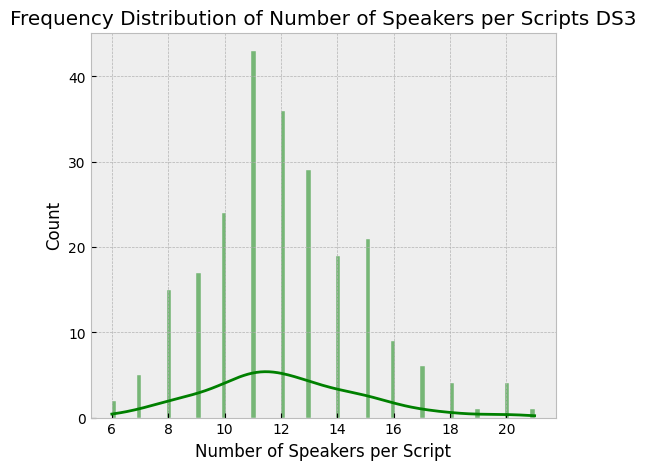

In [40]:
print("Frequency distribution plot")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script'))

In [41]:
output = outliers(numspeakers_perscriptdf,'Number of Speakers per Script')
outliers_df = output[0]
lxsp = output[1]
rxsp = output[2]

print("Left outliers are outside: ",lxsp,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsp,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(numspeakers_perscriptdf[numspeakers_perscriptdf['Number of Speakers per Script'] > rxsp])*100)/len(numspeakers_perscriptdf),'%')

Left outliers are outside:  4.0 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  20.0 .
These are there; see plot.
Percentage of the whole  0.423728813559322 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS3'}, xlabel='Number of Speakers per Script', ylabel='Count'>

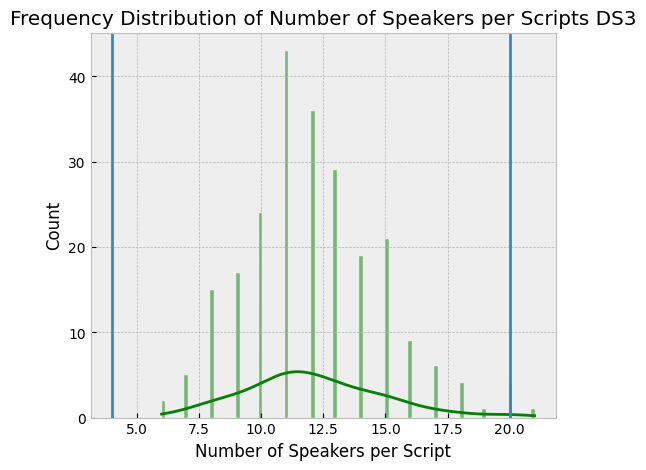

In [42]:
print("Frequency distribution plot with outlier boundaries")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script',lx=lxsp,rx=rxsp))
# Save plot to file
#plt.savefig("friendsSPEAKERSFrequencynumspeakers.png")

In [43]:
indices = outliers_df.index
numspeakers_perscriptdf = numspeakers_perscriptdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS3'}, xlabel='Number of Speakers per Script', ylabel='Count'>

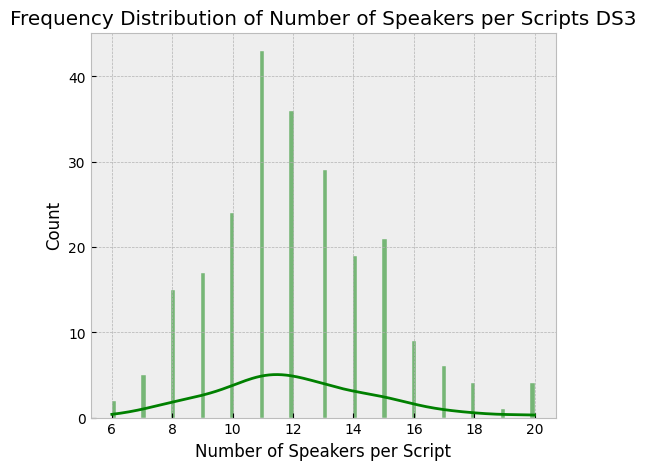

In [44]:
print("Frequency distribution plot without outliers")
ax3 = plots(numspeakers_perscriptdf,'Number of Speakers per Script')
display(ax3)

## Distribution of Negatives and Positives

In [45]:
print('Negatives: ',len(concatted_friends[concatted_friends.Y == 0]),'Positives: ',len(concatted_friends[concatted_friends.Y == 1]))
# Imbalanced

Negatives:  1323 Positives:  57056


<Axes: xlabel='Negatives_ps', ylabel='Count'>

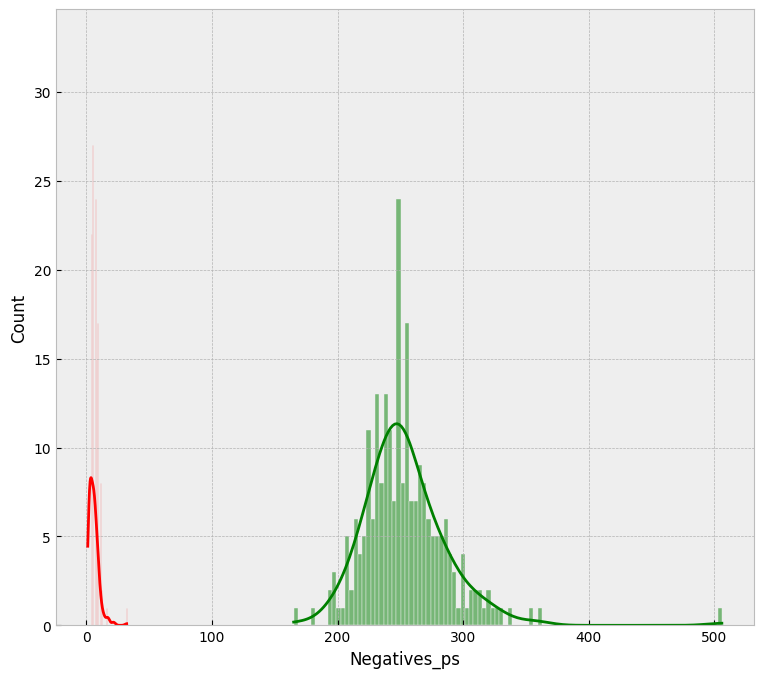

In [46]:
# Shows a distribution of yes or no on different speaker
plt.figure(figsize=(9, 8))
ax = sns.histplot(negsperscriptdf['Negatives_ps'], color='r', bins=100, kde=True)
ax = sns.histplot(posperscriptdf['Positives_ps'], color='g', bins=100, kde=True)
ax